## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
x=np.array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [5]:
a=-1
b=2
y=a*x+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

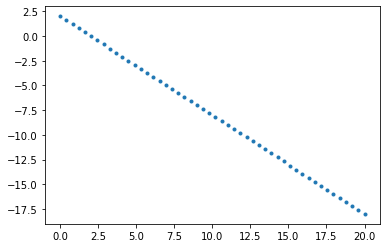

In [9]:
plt.plot(x,y,'.')
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [55]:
m=len(y)
def GD (x,y,lr,it):
    theta_0s=[0]
    theta_1s=[0]
    costs=[]
    h_yhat=[]
    
    for i in range (it):
        print(f'****************** Iteration {i} ********************\n')
    

      #  h = theta_0s[i] + theta_1s[i]*x
        h_yhat.append(theta_0s[i] + theta_1s[i]*x)
        print (f'h(x):{h_yhat[i]}')

        errs=( h_yhat[i]-y)
        print(f'Error Vector:{errs}\n') 

        costs.append(errs@errs/(m*2)) # j or loss
        print(f'j(mse):{costs[i]}\n')

        theta_0drv = (errs.sum())/m #j/theta0
        theta_1drv= ((errs*x).sum())/m # j/th1
        gradient_vec = np.array([[theta_0drv],[theta_1drv]])
        print(f'Gradient Vector:{gradient_vec}\n')

        gradient_vector_norm=np.linalg.norm(gradient_vec,2)
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n') 

        if (gradient_vector_norm<.001  ):
            break


        if i!=0 and abs(costs[i]-costs[i-1])< 0.001 :
                break
        
            
        theta_0s.append( theta_0s[i] - (lr*theta_0drv ))
        theta_1s.append( theta_1s[i] -( lr*theta_1drv ))
        print(f'theta_0_new :{theta_0s[i+1]}, theta_1_new :{theta_1s[i+1]}')
            
            
    print(f'\n\nGradient Descent converged after {i+1} epochs\n')
    print ((f'theta_0_Opt :{theta_0s[-1]} \ntheta_1_Opt:{theta_1s[-1]}\n'))
    print(f'Error Vector:{errs[-1]}\n')
    print(f'Cost :{costs[-1]}\n')
    print(f'h(x) = y_predict:{h_yhat[-1]}')
    print(f'y_actual:{y}')
    
    return theta_0s,theta_1s ,costs,h_yhat,lr

def plot(theta_0s,theta_1s ,costs,h_yhat,lr):
    plt.plot(costs,'.m-')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(theta_0s,costs,'.m-')
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('theta0')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(theta_1s,costs,'.m-')
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('theta1')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(x,y,'.b')
    for i in range( len(h_yhat)):
        plt.plot(x,h_yhat[i],'r')
    plt.title('regression lines till converge')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    plt.plot(x,y,'.b')
    plt.plot(x,h_yhat[-1],'r')
    plt.title('best lines till converge')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


In [56]:
theta_0s1,theta_1s1 ,costs1,h_yhat1 ,lr = GD(x,y,0.01,300)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

theta_0_new :-0.08000000000000002, theta_1_new :-


Gradient Vector Norm:0.47579460504204213

theta_0_new :0.15245843469164397, theta_1_new :-0.8625726756998673
****************** Iteration 43 ********************

h(x):[  0.15245843  -0.19961205  -0.55168252  -0.90375301  -1.25582348
  -1.60789397  -1.95996444  -2.31203493  -2.6641054   -3.01617589
  -3.36824636  -3.72031685  -4.07238732  -4.4244578   -4.77652828
  -5.12859876  -5.48066924  -5.83273972  -6.18481021  -6.53688068
  -6.88895117  -7.24102164  -7.59309213  -7.9451626   -8.29723308
  -8.64930356  -9.00137404  -9.35344452  -9.705515   -10.05758548
 -10.40965596 -10.76172644 -11.11379692 -11.46586741 -11.81793788
 -12.17000836 -12.52207884 -12.87414932 -13.2262198  -13.57829028
 -13.93036076 -14.28243124 -14.63450172 -14.9865722  -15.33864268
 -15.69071316 -16.04278364 -16.39485412 -16.7469246  -17.09899508]
Error Vector:[-1.84754157 -1.79144878 -1.73535599 -1.67926321 -1.62317042 -1.56707764
 -1.51098485 -1.45489207 -1.39879928 -1.3427065  -1.28661371 -1.23052093
 -1.1744281

 -1.68428791e+01 -1.72013199e+01]
Error Vector:[-1.63772106 -1.58799858 -1.53827611 -1.48855364 -1.43883117 -1.38910869
 -1.33938622 -1.28966375 -1.23994127 -1.1902188  -1.14049633 -1.09077385
 -1.04105138 -0.99132891 -0.94160643 -0.89188396 -0.84216149 -0.79243901
 -0.74271654 -0.69299407 -0.64327159 -0.59354912 -0.54382665 -0.49410418
 -0.4443817  -0.39465923 -0.34493676 -0.29521428 -0.24549181 -0.19576934
 -0.14604686 -0.09632439 -0.04660192  0.00312056  0.05284303  0.1025655
  0.15228798  0.20201045  0.25173292  0.3014554   0.35117787  0.40090034
  0.45062281  0.50034529  0.55006776  0.59979023  0.64951271  0.69923518
  0.74895765  0.79868013]

j(mse):0.3454294819798383

Gradient Vector:[[-0.41952047]
 [ 0.03120556]]

Gradient Vector Norm:0.42067946003821305

theta_0_new :0.3664741469201886, theta_1_new :-0.8784919964025911
****************** Iteration 91 ********************

h(x):[ 3.66474147e-01  7.90598100e-03 -3.50662176e-01 -7.09230342e-01
 -1.06779850e+00 -1.42636667e+00 -1.


Gradient Vector Norm:0.3816122538491682

theta_0_new :0.5181746632981623, theta_1_new :-0.8897760705756632
****************** Iteration 129 ********************

h(x):[  0.51817466   0.15500075  -0.20817315  -0.57134706  -0.93452096
  -1.29769487  -1.66086877  -2.02404268  -2.38721659  -2.7503905
  -3.1135644   -3.47673831  -3.83991221  -4.20308612  -4.56626002
  -4.92943393  -5.29260783  -5.65578174  -6.01895566  -6.38212956
  -6.74530347  -7.10847737  -7.47165128  -7.83482518  -8.19799909
  -8.56117299  -8.9243469   -9.28752081  -9.65069472 -10.01386862
 -10.37704253 -10.74021643 -11.10339034 -11.46656425 -11.82973815
 -12.19291206 -12.55608596 -12.91925988 -13.28243378 -13.64560769
 -14.00878159 -14.3719555  -14.7351294  -15.09830331 -15.46147721
 -15.82465112 -16.18782503 -16.55099894 -16.91417284 -17.27734675]
Error Vector:[-1.48182534 -1.43683598 -1.39184662 -1.34685726 -1.3018679  -1.25687854
 -1.21188918 -1.16689982 -1.12191047 -1.07692111 -1.03193175 -0.98694239
 -0.94195303 

 -15.88007456 -16.24784305 -16.61561155 -16.98338005 -17.35114855]
Error Vector:[-1.33049221 -1.29009744 -1.24970267 -1.2093079  -1.16891314 -1.12851837
 -1.0881236  -1.04772883 -1.00733406 -0.96693929 -0.92654452 -0.88614976
 -0.84575499 -0.80536022 -0.76496545 -0.72457068 -0.68417591 -0.64378114
 -0.60338637 -0.56299161 -0.52259684 -0.48220207 -0.4418073  -0.40141253
 -0.36101776 -0.32062299 -0.28022823 -0.23983346 -0.19943869 -0.15904392
 -0.11864915 -0.07825438 -0.03785961  0.00253516  0.04292992  0.08332469
  0.12371946  0.16411423  0.204509    0.24490377  0.28529853  0.3256933
  0.36608807  0.40648284  0.44687761  0.48727238  0.52766715  0.56806192
  0.60845668  0.64885145]

j(mse):0.22798391524197778

Gradient Vector:[[-0.34082038]
 [ 0.02535154]]

Gradient Vector Norm:0.3417619515763622

theta_0_new :0.6729159929788668, theta_1_new :-0.9012863322639381
****************** Iteration 172 ********************

h(x):[  0.67291599   0.30504402  -0.06282795  -0.43069993  -0.7985719
  

In [48]:
r2_score(y,h_yhat1[-1])

0.9888470328934037

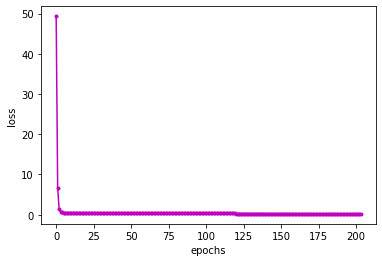

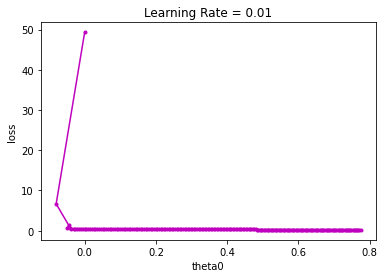

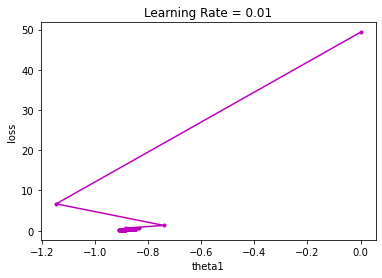

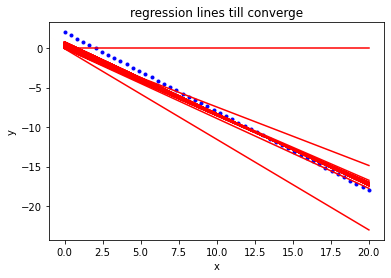

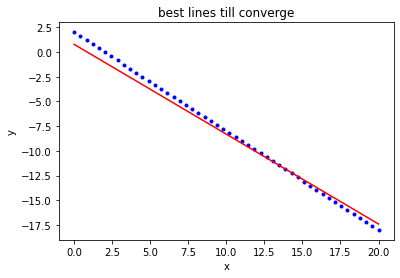

In [57]:
r2_score(y,h_yhat1[-1])
plot(theta_0s1,theta_1s1 ,costs1,h_yhat1,lr)


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [58]:
theta_0s2,theta_1s2 ,costs2,h_yhat2,lr2= GD(x,y,0.0005,300)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

theta_0_new :-0.004000000000000001, theta_1_new :

Gradient Vector:[[-0.37846131]
 [ 2.00288197]]

Gradient Vector Norm:2.0383250804885535

theta_0_new :-0.04643242966542346, theta_1_new :-0.8341854061463784
****************** Iteration 59 ********************

h(x):[ -0.04643243  -0.38691627  -0.72740011  -1.06788395  -1.40836779
  -1.74885163  -2.08933546  -2.42981931  -2.77030314  -3.11078698
  -3.45127082  -3.79175466  -4.1322385   -4.47272234  -4.81320618
  -5.15369002  -5.49417385  -5.8346577   -6.17514154  -6.51562537
  -6.85610922  -7.19659305  -7.5370769   -7.87756073  -8.21804457
  -8.55852841  -8.89901225  -9.23949609  -9.57997993  -9.92046376
 -10.26094761 -10.60143144 -10.94191529 -11.28239913 -11.62288296
 -11.96336681 -12.30385064 -12.64433448 -12.98481832 -13.32530216
 -13.665786   -14.00626984 -14.34675368 -14.68723752 -15.02772135
 -15.3682052  -15.70868903 -16.04917287 -16.38965671 -16.73014055]
Error Vector:[-2.04643243 -1.978753   -1.91107358 -1.84339415 -1.77571473 -1.7080353
 -1.64035587 -1.57267645 -1.50499702 -

r2 score is :0.9686158031908139


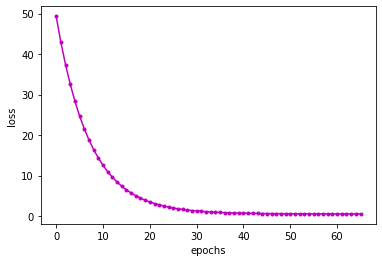

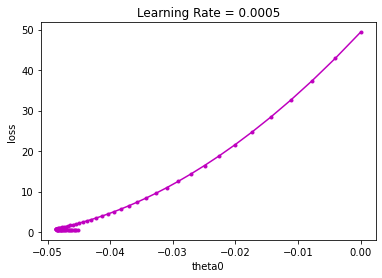

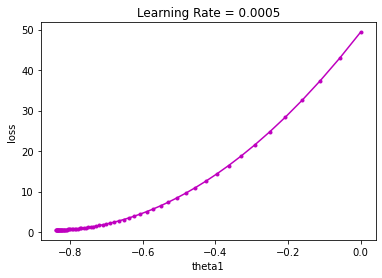

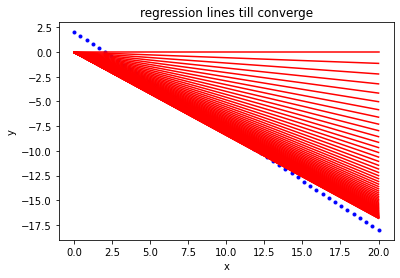

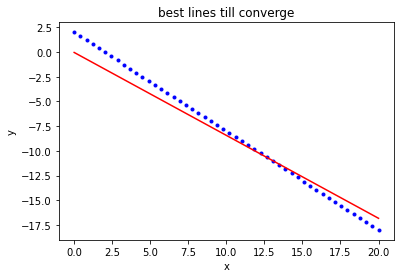

In [61]:
print(f'r2 score is :{r2_score(y,h_yhat2[-1])}')
plot(theta_0s2,theta_1s2,costs2,h_yhat2,lr2)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

In [99]:
m=len(y)
def GDM (x,y,lr,it,gam):
    theta_0s=[0]
    theta_1s=[0]
    mt_0s=[0]
    mt_1s=[0]
    costs=[]
    gradient_vecs=[]
#    errs=[]
    h_yhat=[]
    
    for i in range (it):
        print(f'****************** Iteration {i} ********************\n')
    

      #  h = theta_0s[i] + theta_1s[i]*x
        h_yhat.append(theta_0s[i] + theta_1s[i]*x)
        print (f'h(x):{h_yhat[i]}\n')

        errs=( h_yhat[i]-y)
        print(f'Error Vector:{errs}\n') 

        costs.append(errs@errs/(m*2)) # j or loss
        print(f'j(mse):{costs[i]}\n')

        theta_0drv = (errs.sum())/m #j/theta0
        theta_1drv= ((errs*x).sum())/m # j/th1
        gradient_vec = np.array([[theta_0drv],[theta_1drv]])
        print(f'Gradient Vector:{gradient_vec}\n')

        gradient_vector_norm=np.linalg.norm(gradient_vec,2)
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n') 

        if (gradient_vector_norm<.001  ):
            break


        if i!=0 and abs(costs[i]-costs[i-1])< 0.001 :
                break
        
        mt_0s.append((gam*mt_0s[i])+(lr*theta_0drv))
        mt_1s.append((gam*mt_1s[i])+(lr*theta_1drv))
        theta_0s.append( theta_0s[i] -mt_0s[i+1])
        theta_1s.append( theta_1s[i] -mt_1s[i+1]) 
        print(f'M0:{mt_0s[i+1]}\nM1: {mt_1s[i+1]}')
        print(f'theta_0_new :{theta_0s[i+1]} \ntheta_1_new :{theta_1s[i+1]}')
       
            
            
    print(f'\n\nGradient Descent converged after {i+1} epochs\n')
    print ((f'theta_0_Opt :{theta_0s[-1]} \ntheta_1_Opt:{theta_1s[-1]}\n'))
    print(f'Error Vector:{errs[-1]}\n')
    print(f'Cost :{costs[-1]}\n')
    print(f'h(x) = y_predict:{h_yhat[-1]}')
    print(f'y_actual:{y}')
    
    return theta_0s,theta_1s ,costs,h_yhat,lr,gam

def plot(theta_0s,theta_1s ,costs,h_yhat,lr,gam):
    plt.plot(costs,'.m-')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(theta_0s,costs,'.m-')
    plt.title(f'Learning Rate = {lr} & Gamma: {gam}')
    plt.xlabel('theta0')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(theta_1s,costs,'.m-')
    plt.title(f'Learning Rate = {lr} & Gamma: {gam}')
    plt.xlabel('theta1')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(x,y,'.b')
    for i in range( len(h_yhat)):
        plt.plot(x,h_yhat[i],'r')
    plt.title('regression lines till converge')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    plt.plot(x,y,'.b')
    plt.plot(x,h_yhat[-1],'r')
    plt.title('best lines till converge')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


#### γ takes values between 0 and 1.

In [100]:
theta_0s3,theta_1s3,costs3,h_yhat3,lr3,gam3= GDM(x,y,0.0005,300,0.5)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

r2 score is :0.9687892837384409


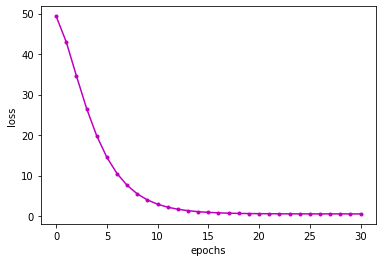

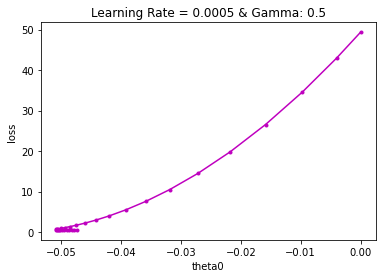

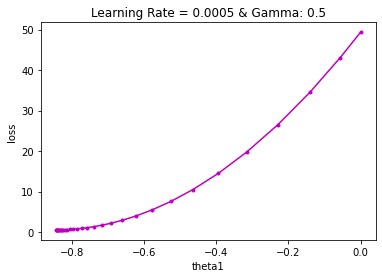

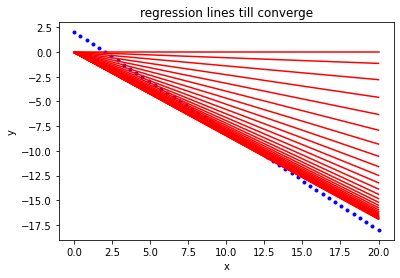

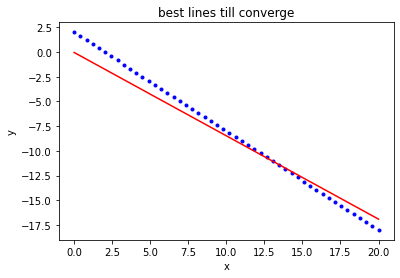

In [101]:
print(f'r2 score is :{r2_score(y,h_yhat3[-1])}')
plot(theta_0s3,theta_1s3,costs3,h_yhat3,lr3,gam3)

r2_score: 0.9687892837396442


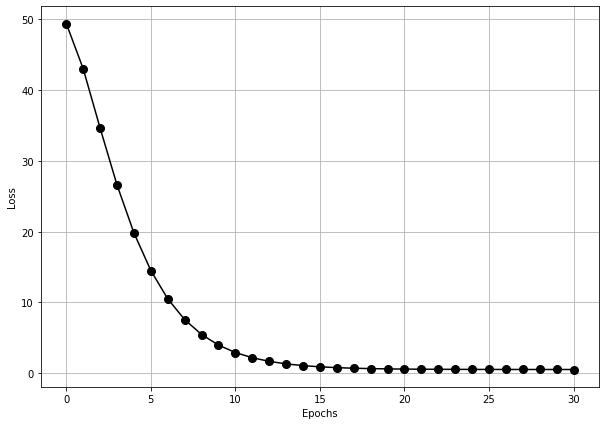

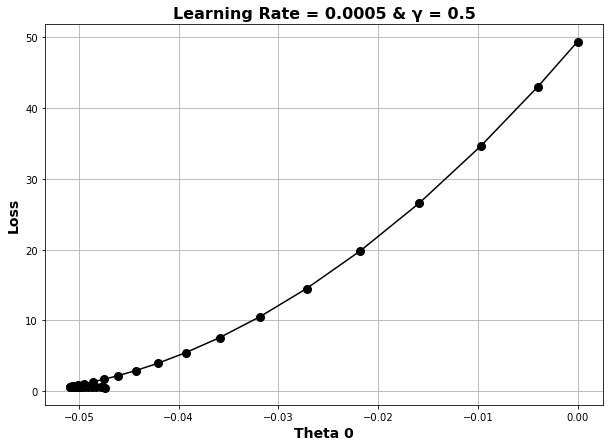

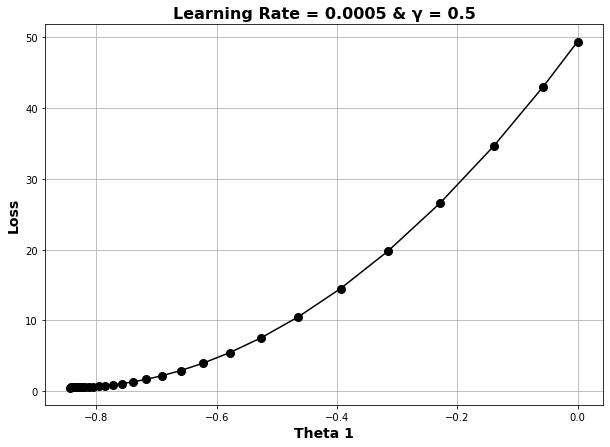

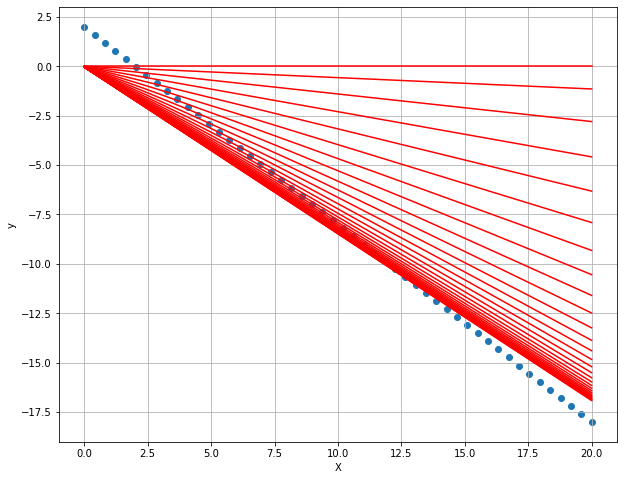

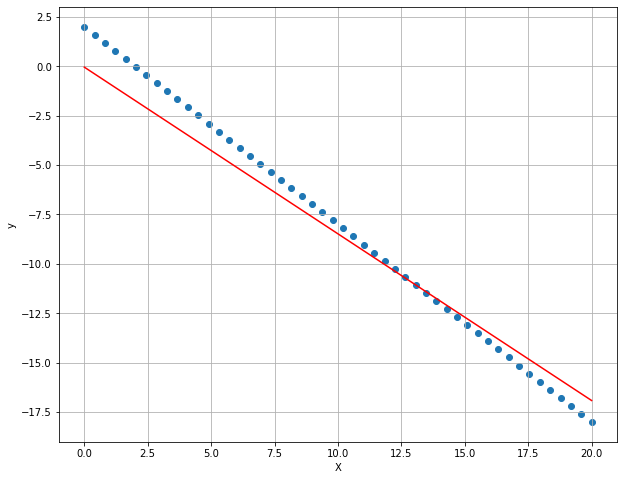

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [102]:
theta_0s4,theta_1s4,costs4,h_yhat4,lr4,gam4= GDM(x,y,0.0005,300,0.9)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448



j(mse):0.7784184874663606

Gradient Vector:[[0.14264813]
 [8.72762797]]

Gradient Vector Norm:8.728793648044848

M0:-0.0028465264496198017
M1: -0.004087764744760647
theta_0_new :0.0410464793726388 
theta_1_new :-0.7854674180024108
****************** Iteration 47 ********************

h(x):[  0.04104648  -0.27955247  -0.60015141  -0.92075036  -1.2413493
  -1.56194825  -1.8825472   -2.20314615  -2.52374509  -2.84434404
  -3.16494298  -3.48554193  -3.80614087  -4.12673982  -4.44733876
  -4.76793771  -5.08853665  -5.4091356   -5.72973455  -6.0503335
  -6.37093245  -6.69153139  -7.01213034  -7.33272928  -7.65332823
  -7.97392717  -8.29452612  -8.61512506  -8.93572401  -9.25632296
  -9.5769219   -9.89752085 -10.2181198  -10.53871875 -10.85931769
 -11.17991664 -11.50051558 -11.82111453 -12.14171347 -12.46231242
 -12.78291136 -13.10351031 -13.42410926 -13.74470821 -14.06530715
 -14.3859061  -14.70650504 -15.02710399 -15.34770293 -15.66830188]

Error Vector:[-1.95895352 -1.8713892  -1.78382488

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

r2 score is :0.9735895911098302


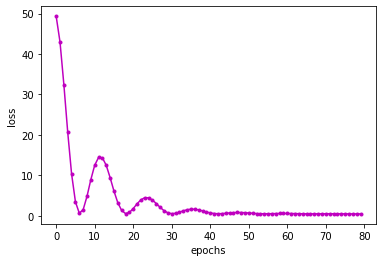

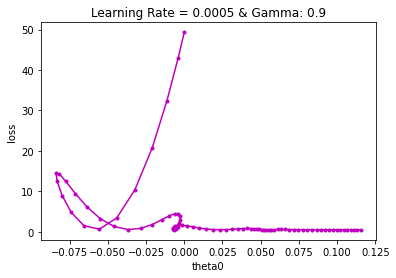

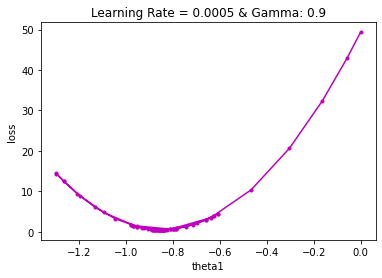

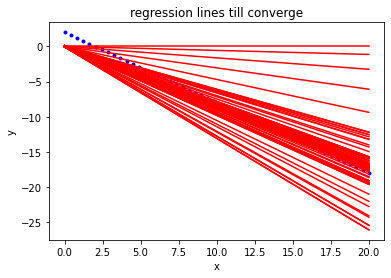

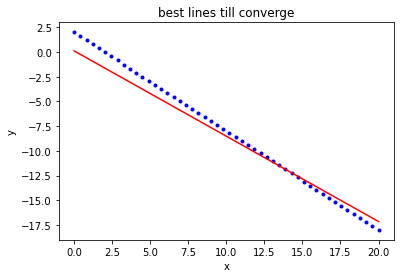

In [104]:
print(f'r2 score is :{r2_score(y,h_yhat4[-1])}')
plot(theta_0s4,theta_1s4,costs4,h_yhat4,lr4,gam4)

r2_score 0.973589591111118


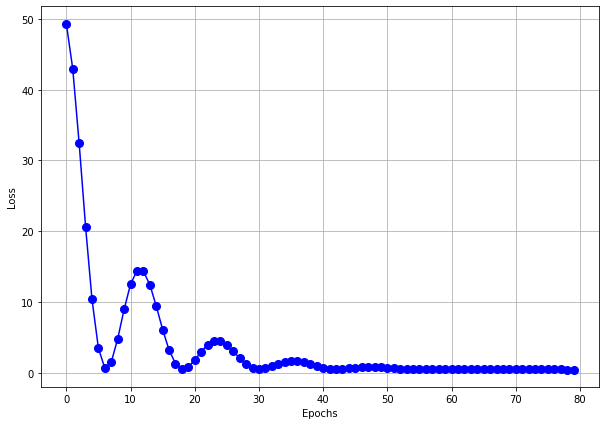

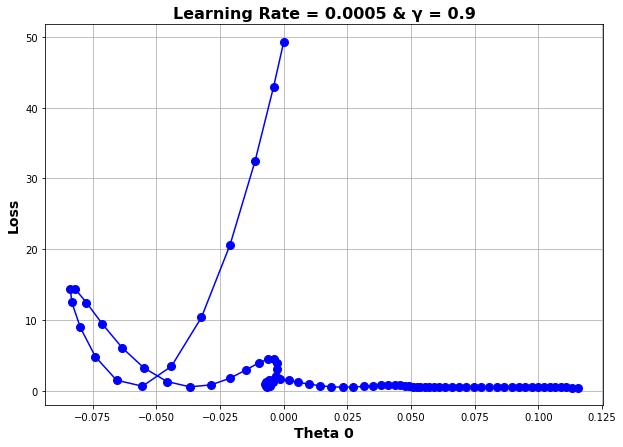

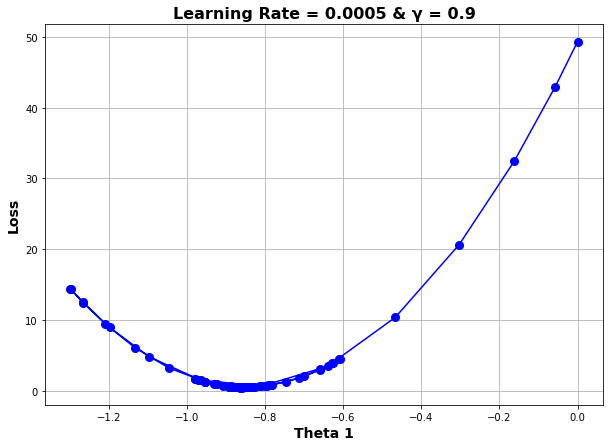

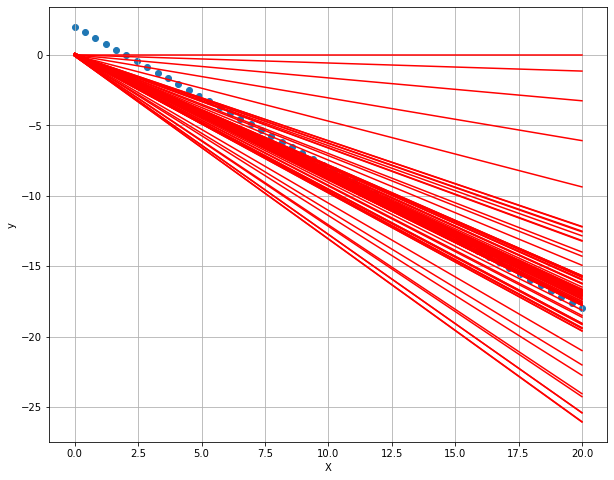

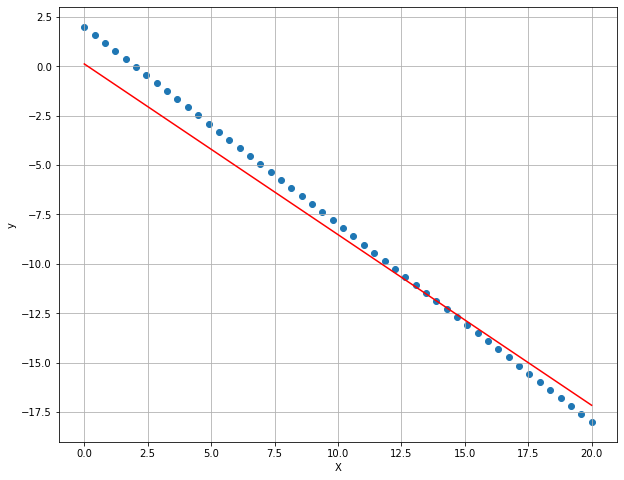

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448



Error Vector:[-1.95769062 -1.88893448 -1.82017834 -1.75142221 -1.68266607 -1.61390993
 -1.54515379 -1.47639765 -1.40764151 -1.33888537 -1.27012924 -1.2013731
 -1.13261696 -1.06386082 -0.99510468 -0.92634854 -0.8575924  -0.78883626
 -0.72008013 -0.65132399 -0.58256785 -0.51381171 -0.44505557 -0.37629943
 -0.30754329 -0.23878716 -0.17003102 -0.10127488 -0.03251874  0.0362374
  0.10499354  0.17374968  0.24250582  0.31126195  0.38001809  0.44877423
  0.51753037  0.58628651  0.65504265  0.72379879  0.79255492  0.86131106
  0.9300672   0.99882334  1.06757948  1.13633562  1.20509176  1.27384789
  1.34260403  1.41136017]

j(mse):0.5295508324961076

Gradient Vector:[[-0.27316522]
 [ 3.11261954]]

Gradient Vector Norm:3.1245831103665425

M0:-0.001525550096300893
M1: 0.010555715753332862
theta_0_new :0.04383492812996198 
theta_1_new :-0.8421031760493527
****************** Iteration 53 ********************

h(x):[  0.04383493  -0.29988066  -0.64359624  -0.98731182  -1.3310274
  -1.67474299  -2.01

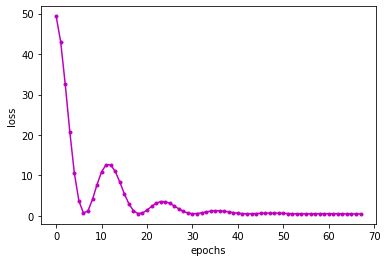

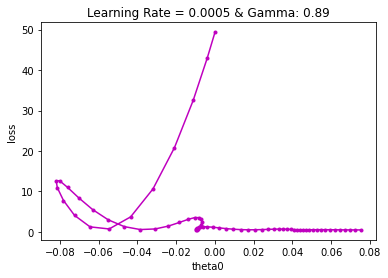

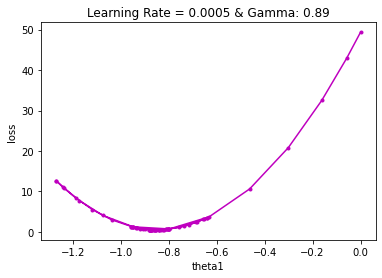

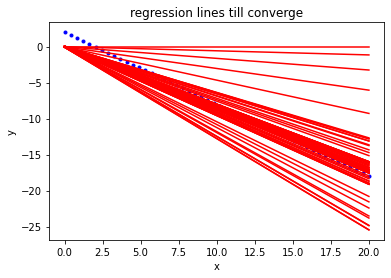

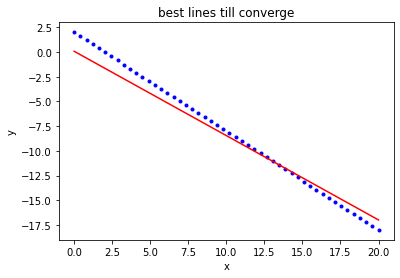

In [105]:
theta_0s5,theta_1s5,costs5,h_yhat5,lr5,gam5= GDM(x,y,0.0005,300,0.89)



****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

r2 score is :0.9735895911098302


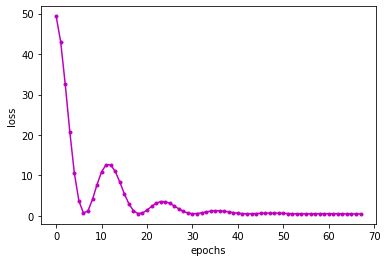

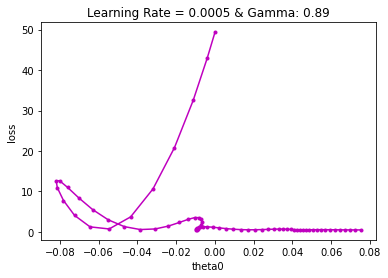

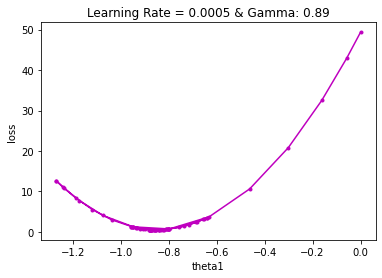

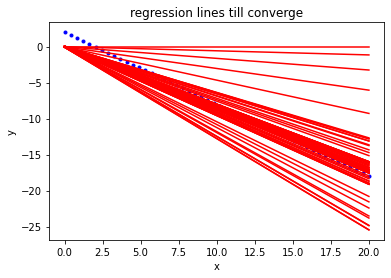

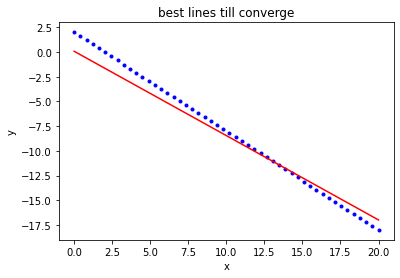

In [106]:
print(f'r2 score is :{r2_score(y,h_yhat4[-1])}')
plot(theta_0s5,theta_1s5,costs5,h_yhat5,lr5,gam5)

r2 score =  0.972435565060376


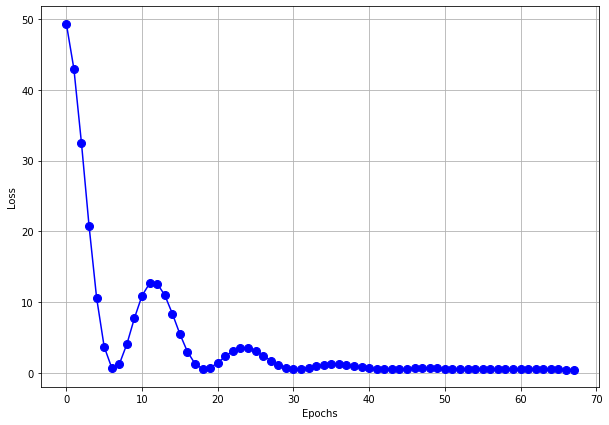

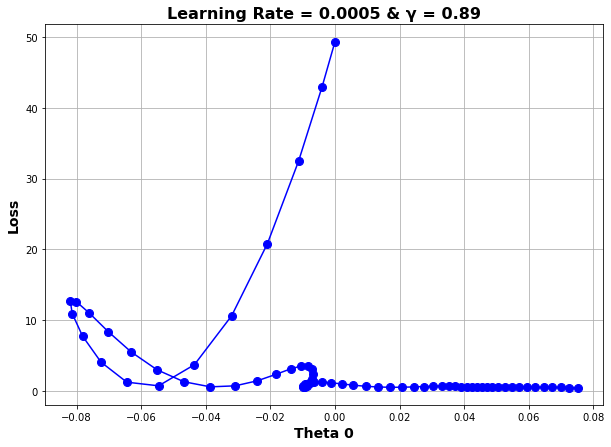

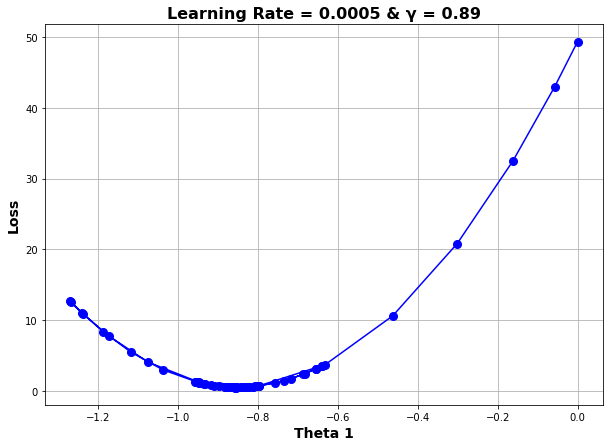

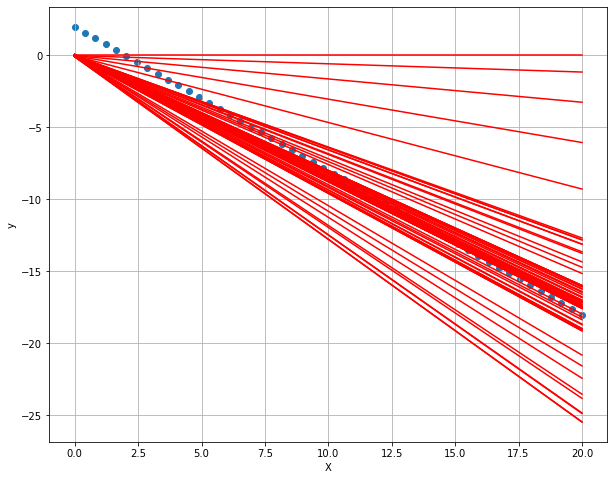

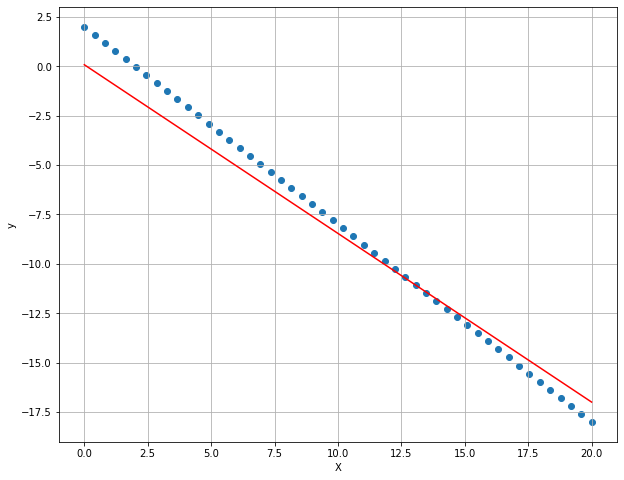

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [144]:
theta_0s6,theta_1s6,costs6,h_yhat6,lr6,gam6= GDM(x,y,0.0005,300,.97)


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448



Gradient Vector Norm:21.483692555367426

M0:-0.013492006216673002
M1: -0.09702713883102229
theta_0_new :0.12995033353000682 
theta_1_new :-0.6038461808213801
****************** Iteration 44 ********************

h(x):[  0.12995033  -0.1165175   -0.36298532  -0.60945316  -0.85592098
  -1.10238881  -1.34885664  -1.59532447  -1.8417923   -2.08826013
  -2.33472795  -2.58119579  -2.82766361  -3.07413144  -3.32059927
  -3.5670671   -3.81353493  -4.06000276  -4.30647059  -4.55293842
  -4.79940625  -5.04587407  -5.2923419   -5.53880973  -5.78527756
  -6.03174539  -6.27821322  -6.52468104  -6.77114888  -7.0176167
  -7.26408453  -7.51055236  -7.75702019  -8.00348802  -8.24995585
  -8.49642368  -8.74289151  -8.98935934  -9.23582716  -9.482295
  -9.72876282  -9.97523065 -10.22169848 -10.46816631 -10.71463414
 -10.96110197 -11.20756979 -11.45403763 -11.70050545 -11.94697328]

Error Vector:[-1.87004967 -1.70835423 -1.54665879 -1.38496336 -1.22326792 -1.06157248
 -0.89987705 -0.73818161 -0.57648618 


j(mse):2.1569467908697213

Gradient Vector:[[ 1.26157818]
 [22.33419892]]

Gradient Vector Norm:22.369801542252432

M0:-0.008723175966235786
M1: -0.02303577616246436
theta_0_new :0.46911054249314005 
theta_1_new :-0.6968451423690645
****************** Iteration 94 ********************

h(x):[  0.46911054   0.18468395  -0.09974263  -0.38416923  -0.66859581
  -0.9530224   -1.23744899  -1.52187558  -1.80630217  -2.09072876
  -2.37515534  -2.65958193  -2.94400852  -3.22843511  -3.5128617
  -3.79728829  -4.08171487  -4.36614147  -4.65056806  -4.93499464
  -5.21942123  -5.50384782  -5.78827441  -6.072701    -6.35712759
  -6.64155417  -6.92598077  -7.21040735  -7.49483394  -7.77926053
  -8.06368712  -8.3481137   -8.6325403   -8.91696689  -9.20139347
  -9.48582007  -9.77024665 -10.05467324 -10.33909983 -10.62352642
 -10.907953   -11.1923796  -11.47680618 -11.76123277 -12.04565936
 -12.33008595 -12.61451254 -12.89893913 -13.18336571 -13.4677923 ]

Error Vector:[-1.53088946 -1.40715278 -1.28341


M0:-0.004477884456923587
M1: 0.018275446258770905
theta_0_new :0.8244323915512716 
theta_1_new :-0.9673869988176254
****************** Iteration 152 ********************

h(x):[  0.82443239   0.42958055   0.03472872  -0.36012312  -0.75497495
  -1.14982679  -1.54467862  -1.93953046  -2.3343823   -2.72923414
  -3.12408597  -3.51893781  -3.91378964  -4.30864148  -4.70349331
  -5.09834515  -5.49319698  -5.88804882  -6.28290067  -6.6777525
  -7.07260434  -7.46745617  -7.86230801  -8.25715984  -8.65201168
  -9.04686351  -9.44171535  -9.83656718 -10.23141902 -10.62627086
 -11.0211227  -11.41597453 -11.81082637 -12.20567821 -12.60053004
 -12.99538188 -13.39023371 -13.78508555 -14.17993738 -14.57478923
 -14.96964106 -15.3644929  -15.75934473 -16.15419657 -16.5490484
 -16.94390024 -17.33875207 -17.73360391 -18.12845574 -18.52330758]

Error Vector:[-1.17556761 -1.16225618 -1.14894475 -1.13563332 -1.12232189 -1.10901046
 -1.09569903 -1.0823876  -1.06907618 -1.05576475 -1.04245332 -1.02914189
 -1.


j(mse):0.15860884684721796

Gradient Vector:[[-0.02666543]
 [ 3.04708115]]

Gradient Vector Norm:3.0471978229919445

M0:-0.005698879497393861
M1: -0.00974214563412532
theta_0_new :1.0238979215629196 
theta_1_new :-0.8947443019873831
****************** Iteration 188 ********************

h(x):[  1.02389792   0.65869616   0.29349441  -0.07170735  -0.4369091
  -0.80211086  -1.16731261  -1.53251437  -1.89771612  -2.26291788
  -2.62811963  -2.99332139  -3.35852315  -3.72372491  -4.08892666
  -4.45412842  -4.81933017  -5.18453193  -5.54973369  -5.91493544
  -6.2801372   -6.64533895  -7.01054071  -7.37574246  -7.74094422
  -8.10614597  -8.47134773  -8.83654949  -9.20175125  -9.566953
  -9.93215476 -10.29735651 -10.66255827 -11.02776003 -11.39296178
 -11.75816354 -12.12336529 -12.48856705 -12.8537688  -13.21897056
 -13.58417231 -13.94937407 -14.31457582 -14.67977758 -15.04497934
 -15.4101811  -15.77538285 -16.14058461 -16.50578636 -16.87098812]

Error Vector:[-0.97610208 -0.93314057 -0.890179


j(mse):0.0796095957699374

Gradient Vector:[[-0.13988268]
 [ 0.80232525]]

Gradient Vector Norm:0.8144280036732839

M0:-0.004363381502433321
M1: -0.005387679400456091
theta_0_new :1.2300309936784555 
theta_1_new :-0.9311673497861701
****************** Iteration 235 ********************

h(x):[  1.23003099   0.84996268   0.46989438   0.08982607  -0.29024223
  -0.67031054  -1.05037884  -1.43044715  -1.81051545  -2.19058376
  -2.57065206  -2.95072037  -3.33078868  -3.71085699  -4.09092529
  -4.4709936   -4.8510619   -5.23113021  -5.61119852  -5.99126682
  -6.37133513  -6.75140343  -7.13147174  -7.51154004  -7.89160835
  -8.27167665  -8.65174497  -9.03181327  -9.41188158  -9.79194988
 -10.17201819 -10.55208649 -10.9321548  -11.31222311 -11.69229141
 -12.07235972 -12.45242802 -12.83249633 -13.21256463 -13.59263294
 -13.97270125 -14.35276956 -14.73283786 -15.11290617 -15.49297447
 -15.87304278 -16.25311108 -16.63317939 -17.01324769 -17.393316  ]

Error Vector:[-0.76996901 -0.74187405 -0.713

r2 score is :0.9735895911098302


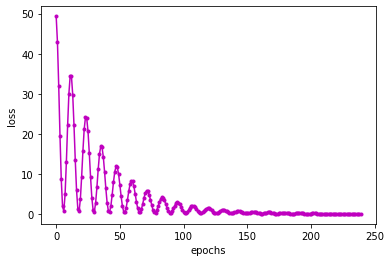

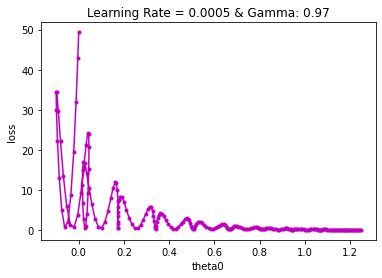

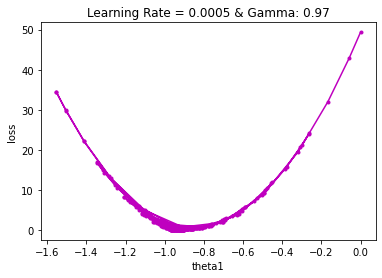

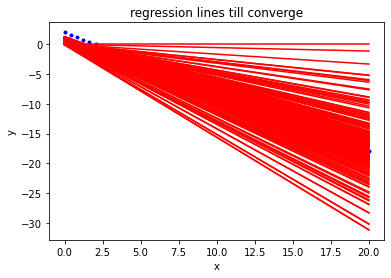

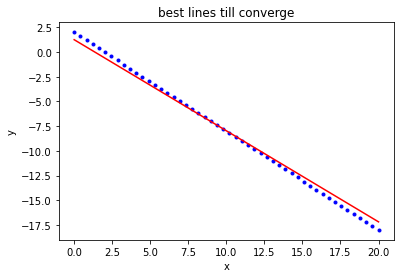

In [145]:
print(f'r2 score is :{r2_score(y,h_yhat4[-1])}')
plot(theta_0s6,theta_1s6,costs6,h_yhat6,lr6,gam6)


### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [223]:
m=len(x)
def NAG (x,y,lr,it,gam):
    theta_0s=[0]
    theta_1s=[0]
    mt_0=0.0
    mt_1=0.0
    costs=[]
    h_yhat=[]
    
    for i in range (it):
        print(f'****************** Iteration {i} ********************\n')
    

        h_yhat.append(theta_0s[i] + theta_1s[i]*x) # calculate y predict (y hat)
        print (f'h(x):{h_yhat[i]}\n')

        errs=( h_yhat[i]-y) # sub y pre from y orginal
        print(f'Error Vector:{errs}\n') 
        
        costs.append(errs@errs/(m*2)) # j or loss or cost with MSE 
        print(f'j(mse):{costs[i]}\n')

                
        th0_tmp=theta_0s[i]-(gam*mt_0) # cal theta0 tmp 
        th1_tmp=theta_1s[i]-(gam*mt_1) # cal theta1 tmp 
        
        er=(th0_tmp + th1_tmp*x)-y
        theta_0drv_tmp = (er.sum())/m #j/theta0 tmp or gradient
        theta_1drv_tmp = ((er*x).sum())/m # j/th1 tmp or gradient
        
        
        gradient_vec = np.array([[theta_0drv_tmp],[theta_1drv_tmp]]) # gradient vec
        print(f'Gradient Vector:{gradient_vec}\n')
        
        gradient_vector_norm=np.linalg.norm(gradient_vec,2)
        print(f'Gradient Vector Norm:{gradient_vector_norm}\n')
        
        if (gradient_vector_norm<.001  ):
            print('norm')
            break


        if i!=0 and abs(costs[i]-costs[i-1])< 0.001 :
            print('cost')
            break
                
        
        theta_0s.append(th0_tmp -(lr*theta_0drv_tmp)) #update eq with nag
        theta_1s.append( th1_tmp -(lr*theta_1drv_tmp)) 
        
        mt_0=(gam*mt_0)+(lr*theta_0drv_tmp) # new momnten for next it
        mt_1=(gam*mt_1)+(lr*theta_1drv_tmp)

        
        print(f'M0:{mt_0}\nM1: {mt_1}')
        print(f'theta_0_new :{theta_0s[i+1]} \ntheta_1_new :{theta_1s[i+1]}')
       
            
            
    print(f'\n\nGradient Descent converged after {i+1} epochs\n')
    print ((f'theta_0_Opt :{theta_0s[-1]} \ntheta_1_Opt:{theta_1s[-1]}\n'))
    print(f'Error Vector:{errs}\n')
    print(f'Cost :{costs[-1]}\n')
    print(f'h(x) = y_predict:{h_yhat[-1]}')
    print(f'y_actual:{y}')
    
    return theta_0s,theta_1s ,costs,h_yhat,lr,gam

def plot(theta_0s,theta_1s ,costs,h_yhat,lr,gam):
    plt.plot(costs,'.m-')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(theta_0s,costs,'.m-')
    plt.title(f'Learning Rate = {lr} & Gamma: {gam}')
    plt.xlabel('theta0')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(theta_1s,costs,'.m-')
    plt.title(f'Learning Rate = {lr} & Gamma: {gam}')
    plt.xlabel('theta1')
    plt.ylabel('loss')
    plt.show()
    
    plt.plot(x,y,'.b')
    for i in range( len(h_yhat)):
        plt.plot(x,h_yhat[i],'r')
    plt.title('regression lines till converge')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    plt.plot(x,y,'.b')
    plt.plot(x,h_yhat[-1],'r')
    plt.title('best lines till converge')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [224]:
theta_0s5,theta_1s5,costs5,h_yhat5,lr5,gam5= NAG(x,y,0.0005,300,0.9)


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448


r2 score is :0.9711031307551167


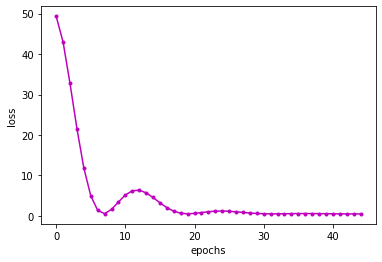

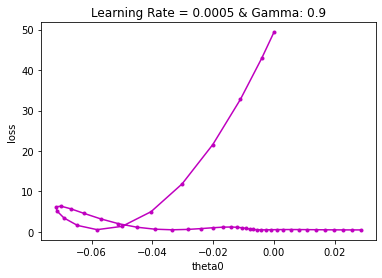

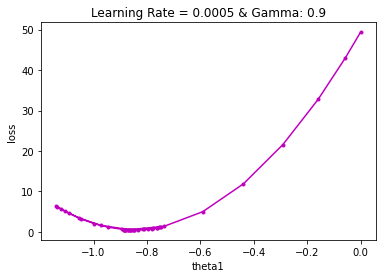

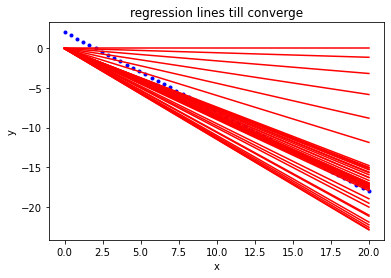

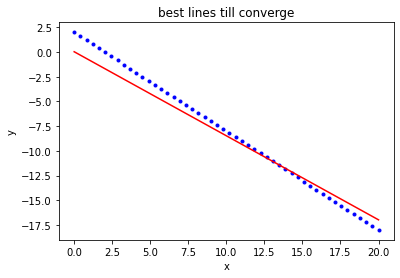

In [225]:
print(f'r2 score is :{r2_score(y,h_yhat5[-1])}')
plot(theta_0s5,theta_1s5,costs5,h_yhat5,lr5,gam5)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2_score 0.971103130756324


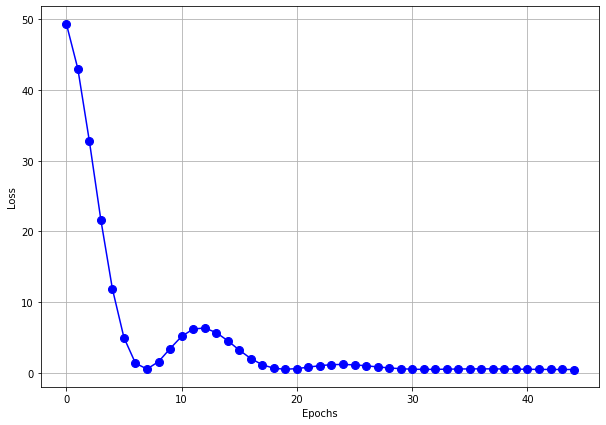

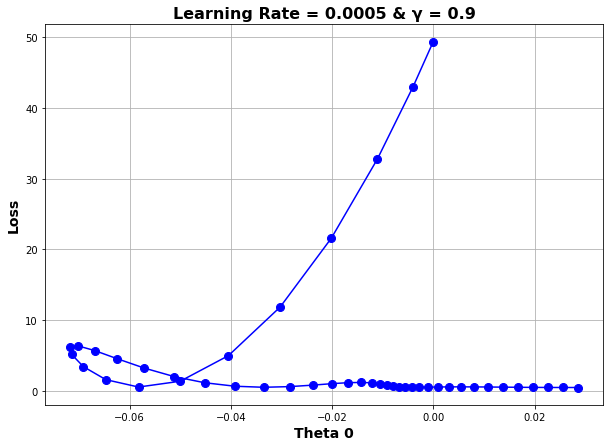

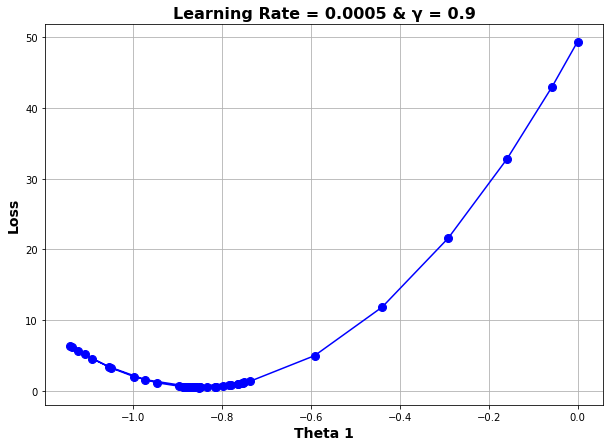

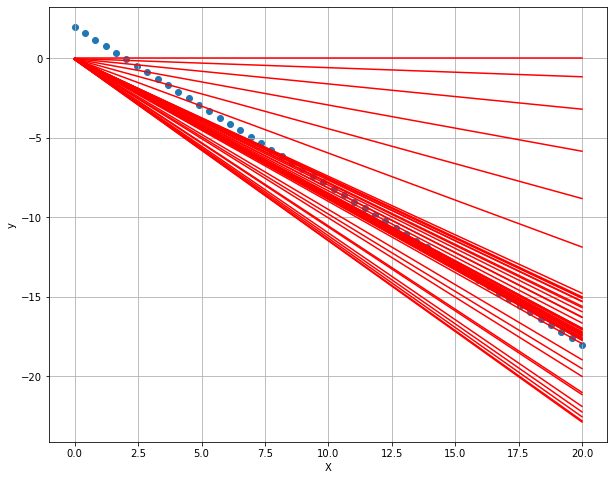

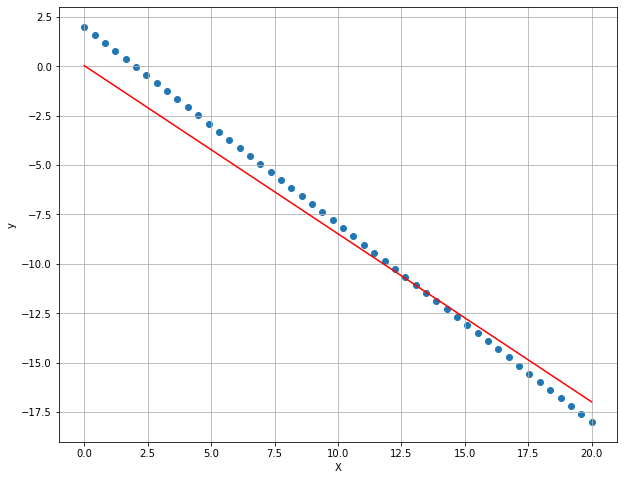

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [226]:
theta_0s6,theta_1s6,costs6,h_yhat6,lr6,gam6= NAG(x,y,0.0005,300,0.89)


****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2 score is :0.9724355650591617


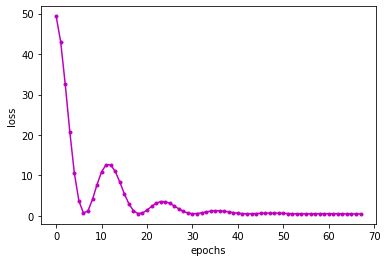

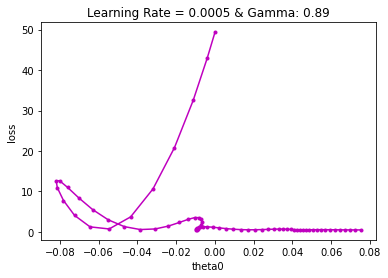

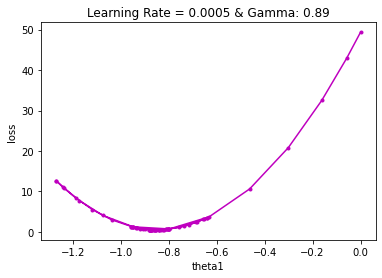

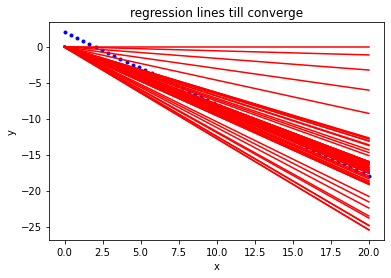

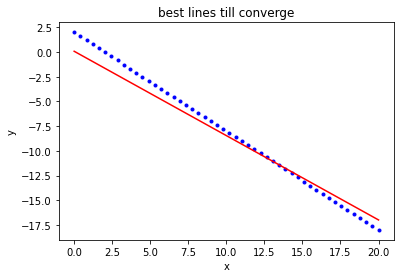

In [187]:
print(f'r2 score is :{r2_score(y,h_yhat6[-1])}')
plot(theta_0s6,theta_1s6,costs6,h_yhat6,lr6,gam6)

r2 score =  0.9699718983158406


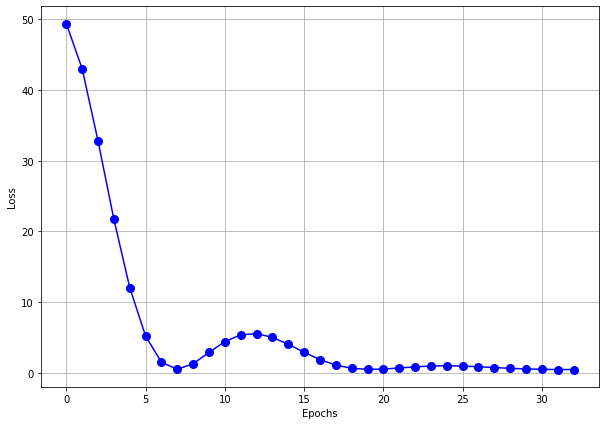

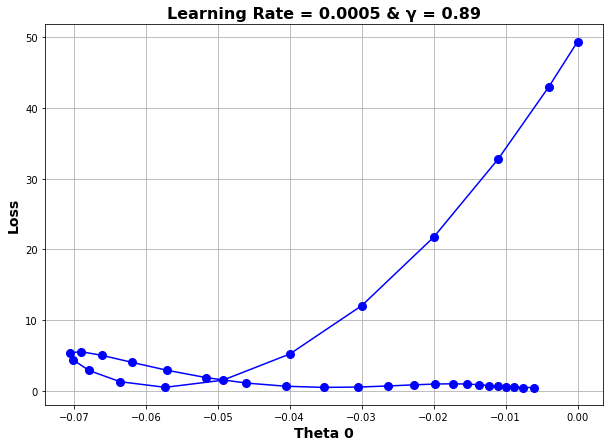

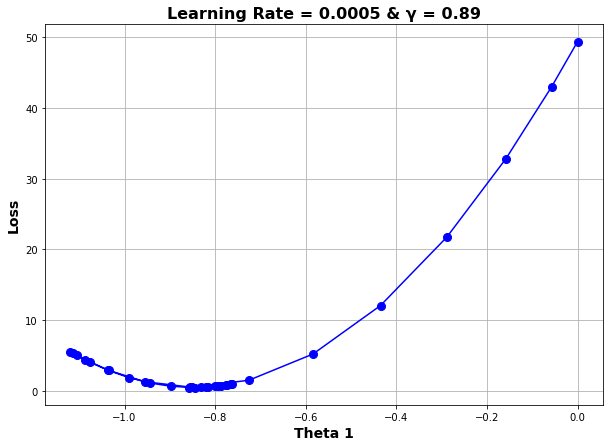

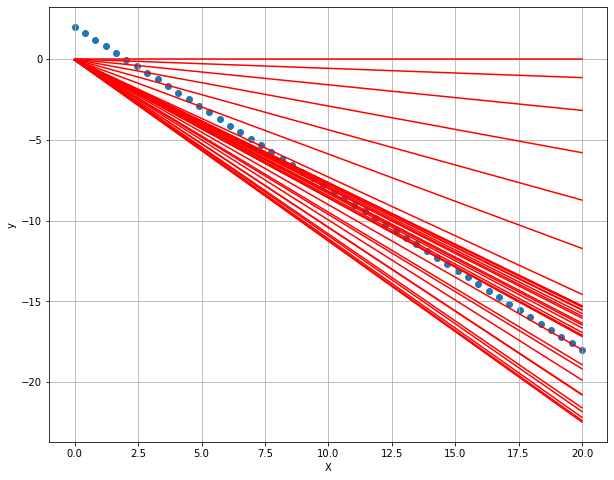

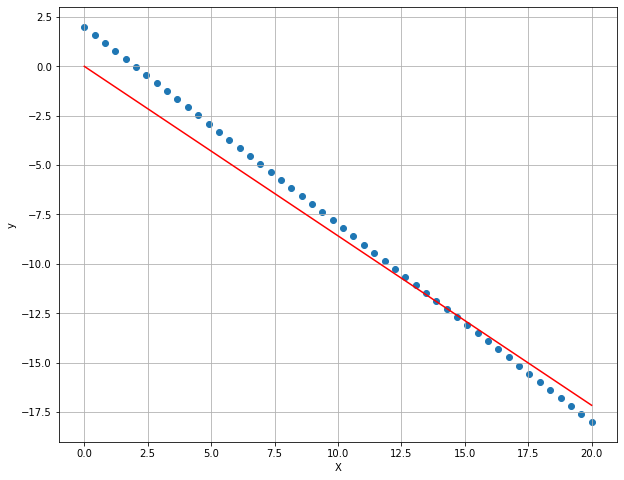

In [242]:
theta_0s7,theta_1s7,costs7,h_yhat7,lr7,gam7= NAG(x,y,0.0005,300,1)

****************** Iteration 0 ********************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j(mse):49.34693877322448

Gradient Vector:[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:114.9725425770859

M0:0.004000000000000001
M1: 0.05734693877322448



j(mse):1.97231702437452

Gradient Vector:[[ 1.27377316]
 [23.26328016]]

Gradient Vector Norm:23.298126577964734

M0:-0.012433819903002803
M1: -0.007553192884474012
theta_0_new :0.23930167323644294 
theta_1_new :-0.7082481804161327
****************** Iteration 47 ********************

h(x):[  0.23930167  -0.04977922  -0.33886011  -0.627941    -0.91702189
  -1.20610278  -1.49518367  -1.78426456  -2.07334544  -2.36242634
  -2.65150722  -2.94058812  -3.229669    -3.5187499   -3.80783078
  -4.09691168  -4.38599256  -4.67507346  -4.96415435  -5.25323524
  -5.54231613  -5.83139702  -6.12047791  -6.40955879  -6.69863969
  -6.98772057  -7.27680147  -7.56588235  -7.85496325  -8.14404413
  -8.43312503  -8.72220591  -9.01128681  -9.3003677   -9.58944859
  -9.87852948 -10.16761036 -10.45669126 -10.74577214 -11.03485304
 -11.32393392 -11.61301482 -11.9020957  -12.1911766  -12.48025748
 -12.76933838 -13.05841926 -13.34750016 -13.63658104 -13.92566194]

Error Vector:[-1.76069833 -1.64161595 -1.52253


j(mse):0.17443313957532766

Gradient Vector:[[0.04127346]
 [3.78949577]]

Gradient Vector Norm:3.789720529403531

M0:-0.020434298528989456
M1: 0.004522670802647695
theta_0_new :1.067951086195452 
theta_1_new :-0.9045645738659289
****************** Iteration 97 ********************

h(x):[  1.06795109   0.69874105   0.32953103  -0.03967901  -0.40888903
  -0.77809907  -1.14730909  -1.51651913  -1.88572915  -2.25493919
  -2.62414921  -2.99335925  -3.36256927  -3.73177931  -4.10098933
  -4.47019937  -4.83940939  -5.20861943  -5.57782946  -5.94703949
  -6.31624952  -6.68545955  -7.05466958  -7.42387961  -7.79308964
  -8.16229967  -8.5315097   -8.90071972  -9.26992976  -9.63913978
 -10.00834982 -10.37755984 -10.74676988 -11.11597991 -11.48518994
 -11.85439997 -12.22361    -12.59282003 -12.96203006 -13.33124009
 -13.70045012 -14.06966015 -14.43887018 -14.80808021 -15.17729024
 -15.54650027 -15.9157103  -16.28492033 -16.65413036 -17.02334039]

Error Vector:[-0.93204891 -0.89309568 -0.85414244

r2 score is :0.9948272901443505


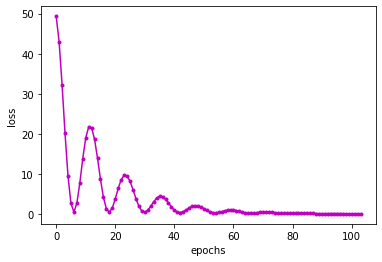

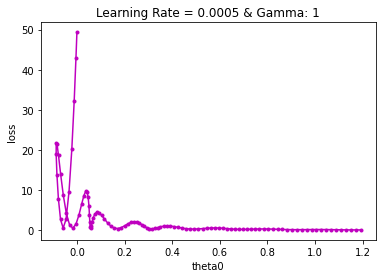

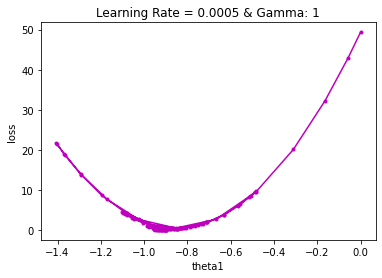

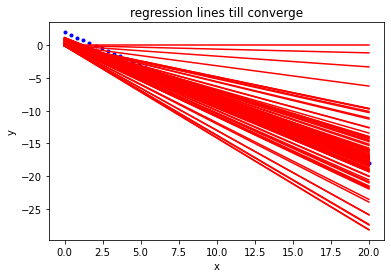

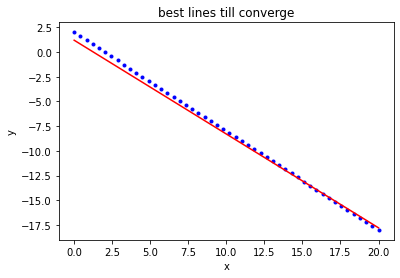

In [243]:
print(f'r2 score is :{r2_score(y,h_yhat7[-1])}')
plot(theta_0s7,theta_1s7,costs7,h_yhat7,lr7,gam7)